In [2]:
from opticalfibre import OpticalFibre

In [14]:
# core_n=input("Input core refractive index: ")
# cladding_n = input("Input cladding refractive index: ")
# index=input("Input profile index Step/Graded: ")
#write in micrometer
fibre1 = OpticalFibre(
    core_radius=(62.5)/2,
    cladding_radius=(92.5)/2,
    core_n=1.48,
    refractive_index_difference=0.01,
    index="Graded",
    wavelength=840e-3,
)

Optical Fibre Properties:
Critical Angle:81.89038554400581
Acceptance Angle:12.081544981155687
Numerical Apparture:0.20930360723121808
Profile :Graded Index Fibre
Normalised Frequency :48.899801094198274
Guided Mode :597
Mode :Multi Mode


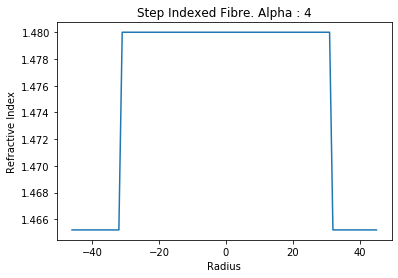

In [12]:
fibre1.plot_profile(alpha=4)

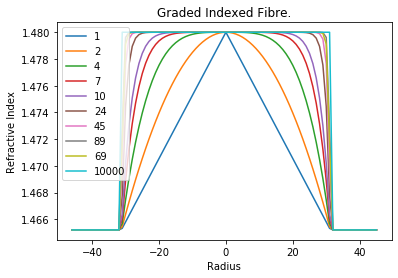

In [17]:
fibre1.plot_multiple_profile(alphas=[1,2,4,7,10,24,45,89,69,10000])